## Analyse properties of the particle's positions.

In [1]:
import numpy as numpy
import xarray as xr
from pathlib import Path
import numpy as np
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt

import sys
sys.path.append(str(Path.cwd().parent))
import heisensim as sim
import scripts.positions as poslib
import scripts.simlib as simlib
PATH = Path.cwd().parent

In [6]:
def distances(geometry, dim=2, N=15):
    data = poslib.load_positions(PATH, geometry, dim, N)
    N = len(data.particle)
    dim = len(data.xyz)
    result = xr.DataArray(np.zeros((len(data.rho), len(data.disorder_realization), (N*(N-1))//2), dtype=np.float32),
                    dims = ["rho", "disorder_realization", "distance"],
                    coords = {"rho":data.rho, "disorder_realization":data.disorder_realization, "distance":np.arange((N*(N-1))//2)})
    for rho in data.rho:
        for realization in data.disorder_realization:
            result.loc[rho, realization] = squareform(simlib.SAMPLING_GENERATORS[geometry](N=N, dim=dim, rho=float(rho)).compute_distances(data.loc[rho, realization]))
    return np.asarray(data.rho), np.asarray(result)

def distance_pdf_plots(dim=2, N=15):
    data = [distances(geom, dim, N) for geom in simlib.SAMPLING_GEOMETRIES]
    rho = data[0][0]
    data = [np.reshape(values, (len(rho), -1)) for rho, values in data]
    BINS = 30
    NCOL = 3
    NROW = int(np.ceil(rho.size/NCOL))
    fig, axes = plt.subplots(NROW, NCOL, sharex="all", sharey="all", squeeze=False, figsize=(NCOL*5, NROW*3))

    for y in range(NROW):
        for x in range(NCOL):
            if y*NCOL+x >= rho.size: break
            for label, values in zip(simlib.SAMPLING_GEOMETRIES, data):
                axes[y,x].hist(values[y*NCOL+x], bins=BINS, histtype="step", density=True, label=label)
            axes[y,x].set_title(f"rho = {rho[y*NCOL+x]}")

    axes[0,0].legend(loc="upper right")
    fig.suptitle(f"{dim}d N={N}", fontsize=18)
    fig.tight_layout()
    fig.show()


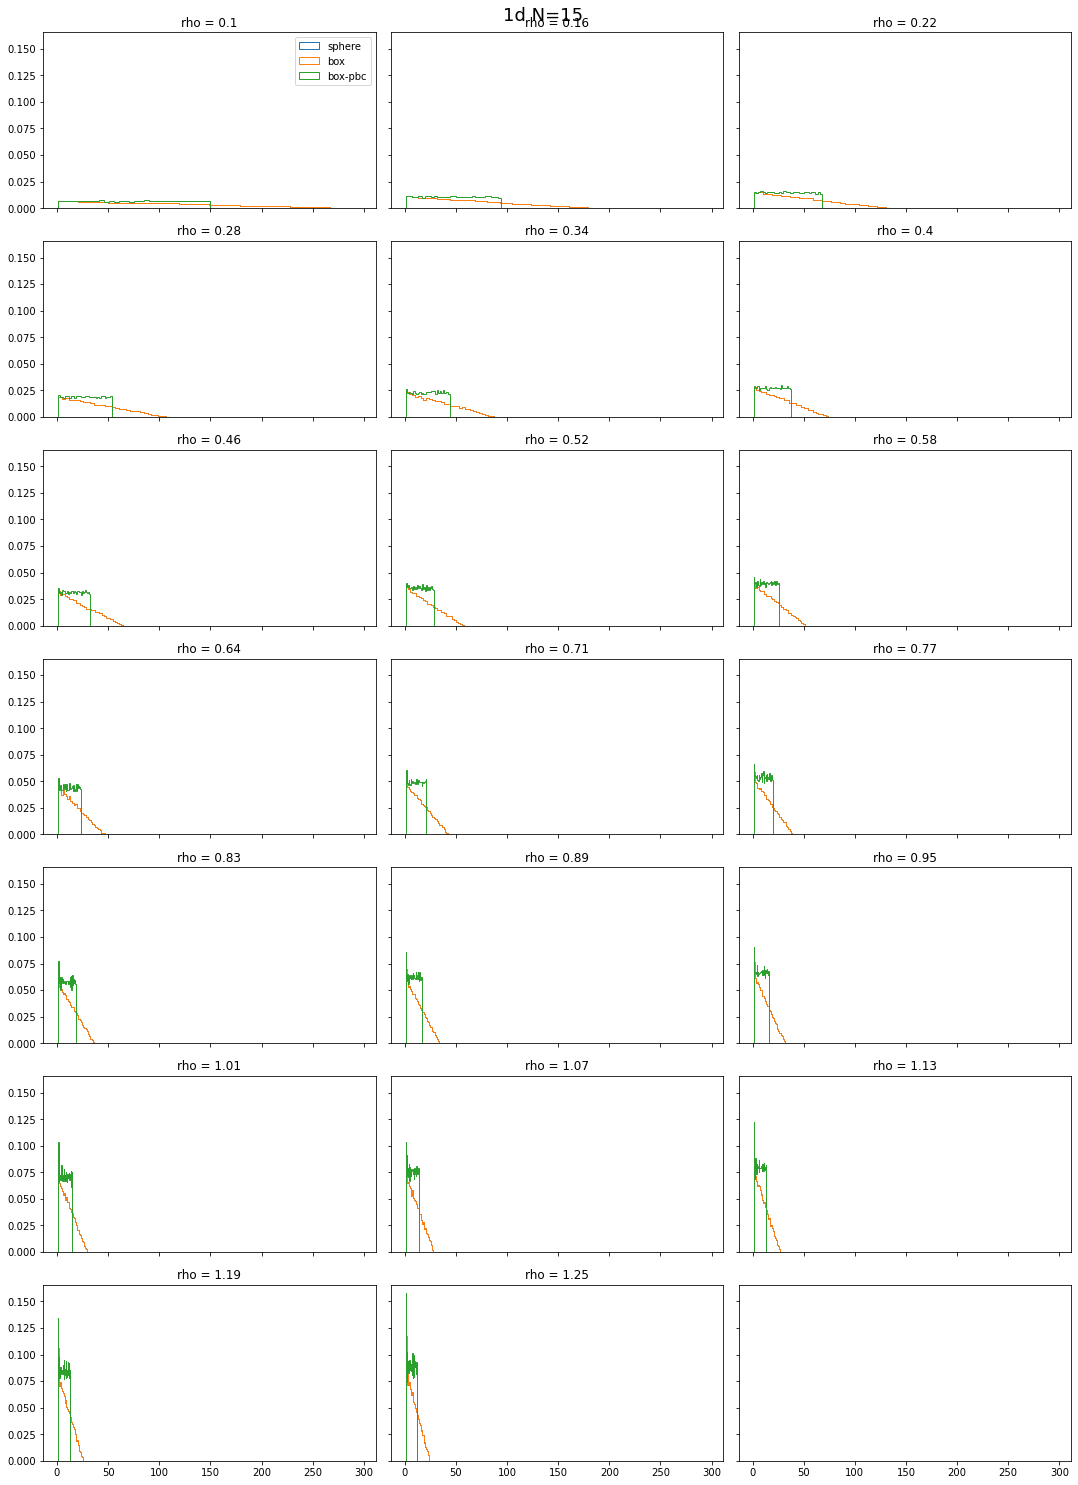

In [10]:
distance_pdf_plots(dim=1, N=15)

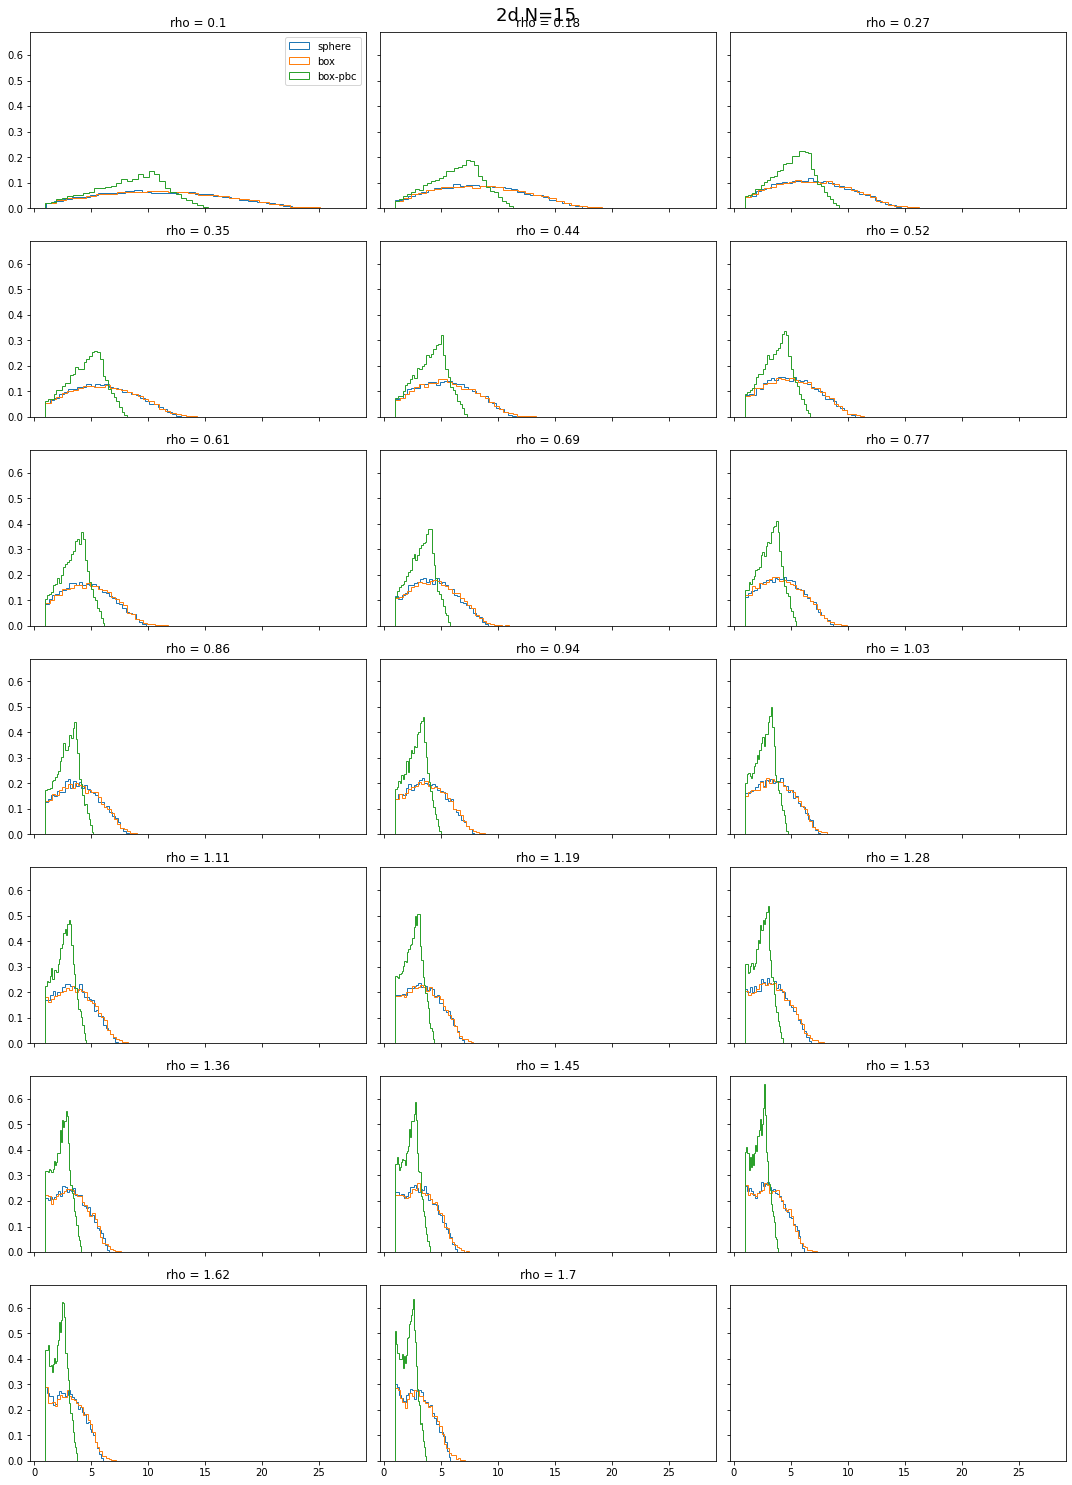

In [11]:
distance_pdf_plots(dim=2, N=15)

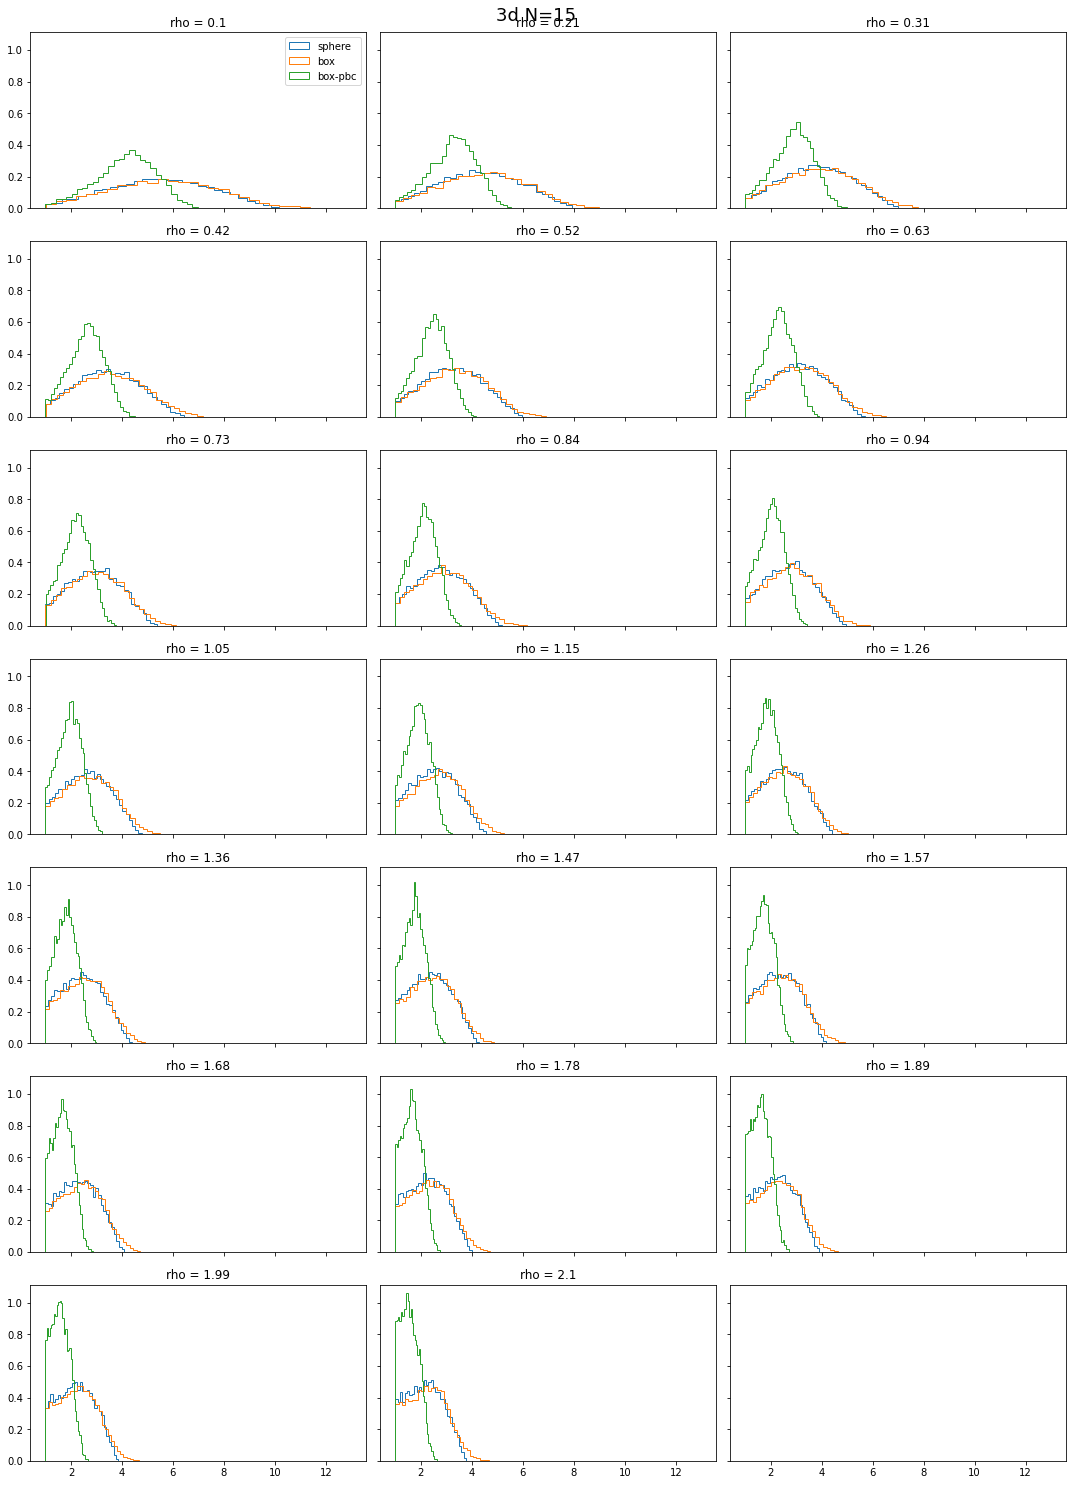

In [12]:
distance_pdf_plots(dim=3, N=15)